In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
data=pd.read_csv('car_data.csv')
data.head(8)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0


In [132]:
data.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [133]:
data.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [134]:
data.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [136]:
from sklearn.impute import SimpleImputer

In [137]:
si=SimpleImputer(strategy='most_frequent')
si.fit(data[['Make','Colour']])

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [138]:
obj=si.transform(data[['Make','Colour']])
obj

array([['Honda', 'White'],
       ['BMW', 'Blue'],
       ['Honda', 'White'],
       ...,
       ['Nissan', 'Blue'],
       ['Honda', 'White'],
       ['Toyota', 'Blue']], shape=(1000, 2), dtype=object)

In [139]:
data[['Make','Colour']]=obj

In [140]:
data['Odometer (KM)'].mean(),data['Doors'].mean(),data['Price'].mean()

(np.float64(131253.23789473684),
 np.float64(4.011578947368421),
 np.float64(16042.814736842105))

In [141]:
Si=SimpleImputer(strategy='mean')
Si.fit(data[['Odometer (KM)', 'Doors', 'Price']])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [142]:
flt=Si.transform(data[['Odometer (KM)', 'Doors', 'Price']])
flt

array([[3.54310e+04, 4.00000e+00, 1.53230e+04],
       [1.92714e+05, 5.00000e+00, 1.99430e+04],
       [8.47140e+04, 4.00000e+00, 2.83430e+04],
       ...,
       [6.66040e+04, 4.00000e+00, 3.15700e+04],
       [2.15883e+05, 4.00000e+00, 4.00100e+03],
       [2.48360e+05, 4.00000e+00, 1.27320e+04]], shape=(1000, 3))

In [143]:
data[['Odometer (KM)', 'Doors', 'Price']]=flt

In [144]:
data.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [145]:
data['Make'].unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object)

In [146]:
# This can be done my Mapping
mp={'Honda':0, 'BMW':2, 'Toyota':5, 'Nissan':4}

In [147]:
mk=data['Make'].map(mp)
mk

0      0
1      2
2      0
3      5
4      4
      ..
995    5
996    5
997    4
998    0
999    5
Name: Make, Length: 1000, dtype: int64

In [148]:
data['Make']=mk
data

,Make,Colour,Odometer (KM),Doors,Price
0,0,White,35431.0,4.0,15323.0
1,2,Blue,192714.0,5.0,19943.0
2,0,White,84714.0,4.0,28343.0
3,5,White,154365.0,4.0,13434.0
4,4,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,5,Black,35820.0,4.0,32042.0
996,5,White,155144.0,3.0,5716.0
997,4,Blue,66604.0,4.0,31570.0
998,0,White,215883.0,4.0,4001.0


Now Encoding Colours

In [149]:
data['Colour'].unique()

array(['White', 'Blue', 'Red', 'Green', 'Black'], dtype=object)

In [150]:
from sklearn.preprocessing import OrdinalEncoder
cat=[['White', 'Blue', 'Red', 'Green', 'Black']]
df=pd.DataFrame(data['Colour'])
df

,Colour
0,White
1,Blue
2,White
3,White
4,Blue
...,...
995,Black
996,White
997,Blue
998,White


In [151]:
Ord=OrdinalEncoder(categories=cat)
Ord.fit(df)

,categories,"[['White', 'Blue', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [152]:
ord_data=Ord.transform(df)

In [153]:
data['Colour']=ord_data

In [155]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,0,0.0,35431.0,4.0,15323.0
1,2,1.0,192714.0,5.0,19943.0
2,0,0.0,84714.0,4.0,28343.0
3,5,0.0,154365.0,4.0,13434.0
4,4,1.0,181577.0,3.0,14043.0
...,...,...,...,...,...
995,5,4.0,35820.0,4.0,32042.0
996,5,0.0,155144.0,3.0,5716.0
997,4,1.0,66604.0,4.0,31570.0
998,0,0.0,215883.0,4.0,4001.0


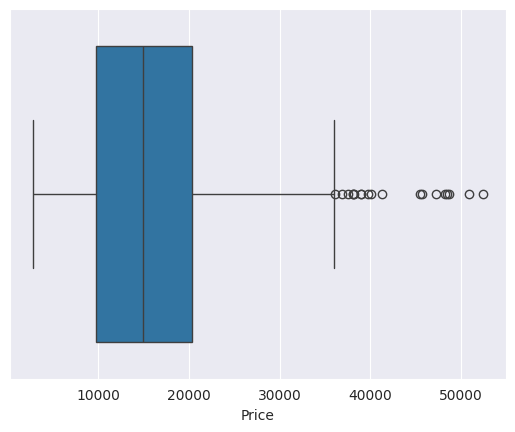

In [160]:
sns.boxplot(x=data['Price'])
plt.show()

/tmp/ipykernel_80994/2155183341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


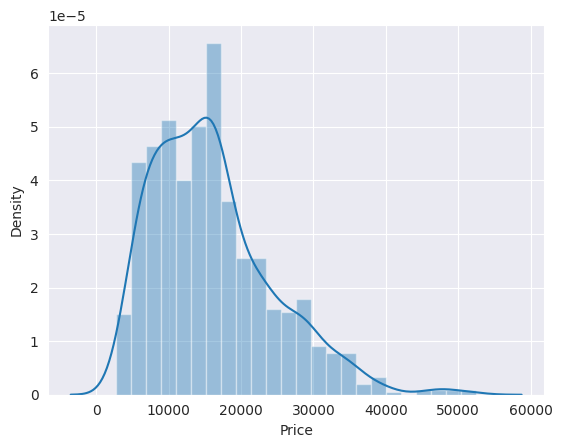

In [183]:
sns.distplot(data['Price'])
plt.show()

# At first i will remove OUTLIERS with INTER-QUANTILE Method

In [163]:
q1=data['Price'].quantile(0.25)
q2=data['Price'].quantile(0.75)
q1,q2

(np.float64(9798.5), np.float64(20322.0))

In [165]:
IQR=q2-q1
IQR

np.float64(10523.5)

In [167]:
min_range=q1-(1.5*IQR)
max_range= q2+(1.5*IQR)
min_range,max_range

(np.float64(-5986.75), np.float64(36107.25))

In [170]:
data1=data[data['Price']<max_range]

In [171]:
data1.shape

(981, 5)

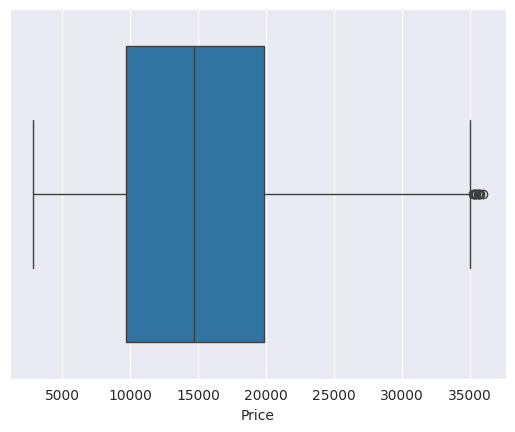

In [173]:
sns.boxplot(x=data1['Price'])
plt.show()

/tmp/ipykernel_80994/1594532868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

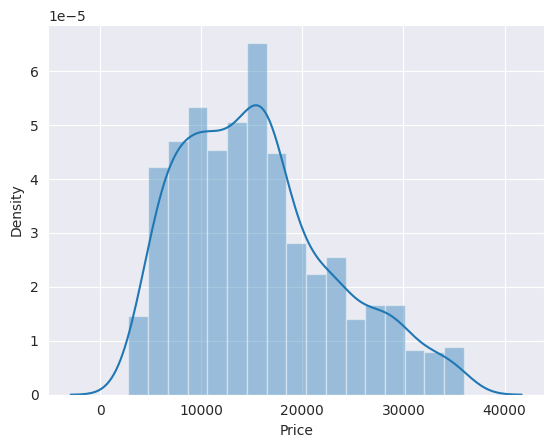

In [182]:
sns.distplot(data1['Price'])

# Now, The outliers will be removed with simple Distribution Method

In [175]:
smin_range=(data['Price'].mean())-(3*data['Price'].std())
smax_range=(data['Price'].mean())+(3*data['Price'].std())
smin_range,smax_range

(np.float64(-9049.72923944186), np.float64(41135.35871312607))

In [176]:
data[data['Price']<smax_range]

,Make,Colour,Odometer (KM),Doors,Price
0,0,0.0,35431.0,4.0,15323.0
1,2,1.0,192714.0,5.0,19943.0
2,0,0.0,84714.0,4.0,28343.0
3,5,0.0,154365.0,4.0,13434.0
4,4,1.0,181577.0,3.0,14043.0
...,...,...,...,...,...
995,5,4.0,35820.0,4.0,32042.0
996,5,0.0,155144.0,3.0,5716.0
997,4,1.0,66604.0,4.0,31570.0
998,0,0.0,215883.0,4.0,4001.0


In [178]:
data2=data[data['Price']<smax_range]
data2

,Make,Colour,Odometer (KM),Doors,Price
0,0,0.0,35431.0,4.0,15323.0
1,2,1.0,192714.0,5.0,19943.0
2,0,0.0,84714.0,4.0,28343.0
3,5,0.0,154365.0,4.0,13434.0
4,4,1.0,181577.0,3.0,14043.0
...,...,...,...,...,...
995,5,4.0,35820.0,4.0,32042.0
996,5,0.0,155144.0,3.0,5716.0
997,4,1.0,66604.0,4.0,31570.0
998,0,0.0,215883.0,4.0,4001.0


<Axes: xlabel='Price'>

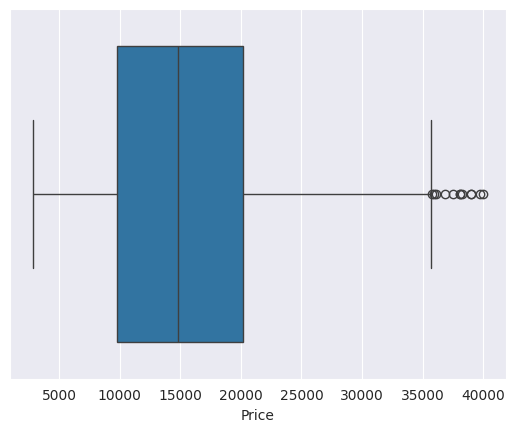

In [180]:
sns.boxplot(x=data2['Price'])

/tmp/ipykernel_80994/1886200035.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Price'])


<Axes: xlabel='Price', ylabel='Density'>

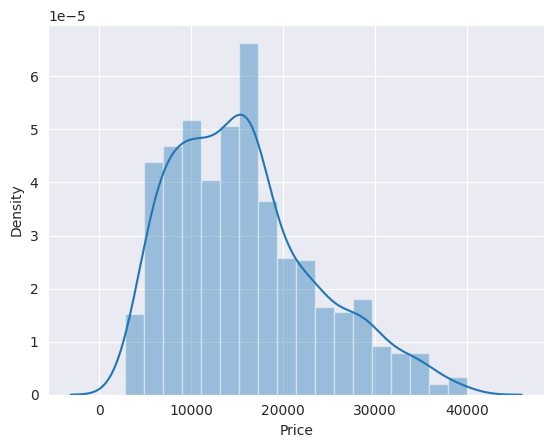

In [181]:
sns.distplot(data2['Price'])